<a href="https://colab.research.google.com/github/janedewes/Py-MachineLearning/blob/master/AlgoritmosDeMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo do algoritmo  não supervisionado k-means**

In [ ]:
#importar as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt


In [ ]:
#cria dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [ ]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y']) #nomes das colunas x, y
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [ ]:
# definir a biblioteca que será usada
#adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [ ]:
# No k-means é necessário dizer o numero de clusters!!
kmeans = KMeans(n_clusters=2) #1. Instancia    # cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df) #aplicar fit para treinar o modelo   #aplica o algoritmo, fit recebe o df e aplica os centróides.
centroides = kmeans.cluster_centers_   #encontra as coordenadas dos centroids e armazena
print(centroides) #valores de  x e y 

[[47.07142857 22.14285714]
 [38.75       61.625     ]]


Text(0, 0.5, 'Y')

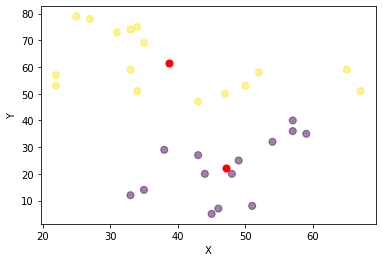

In [ ]:
#realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5) # plot de dispersão (infos do grafico)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50) #plotar os centróides
plt.xlabel("X")
plt.ylabel("Y")

Fim do exemplo do algoritmo k-means

**Exemplo de algoritmo Supervis**ionado - KNN

In [17]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [18]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


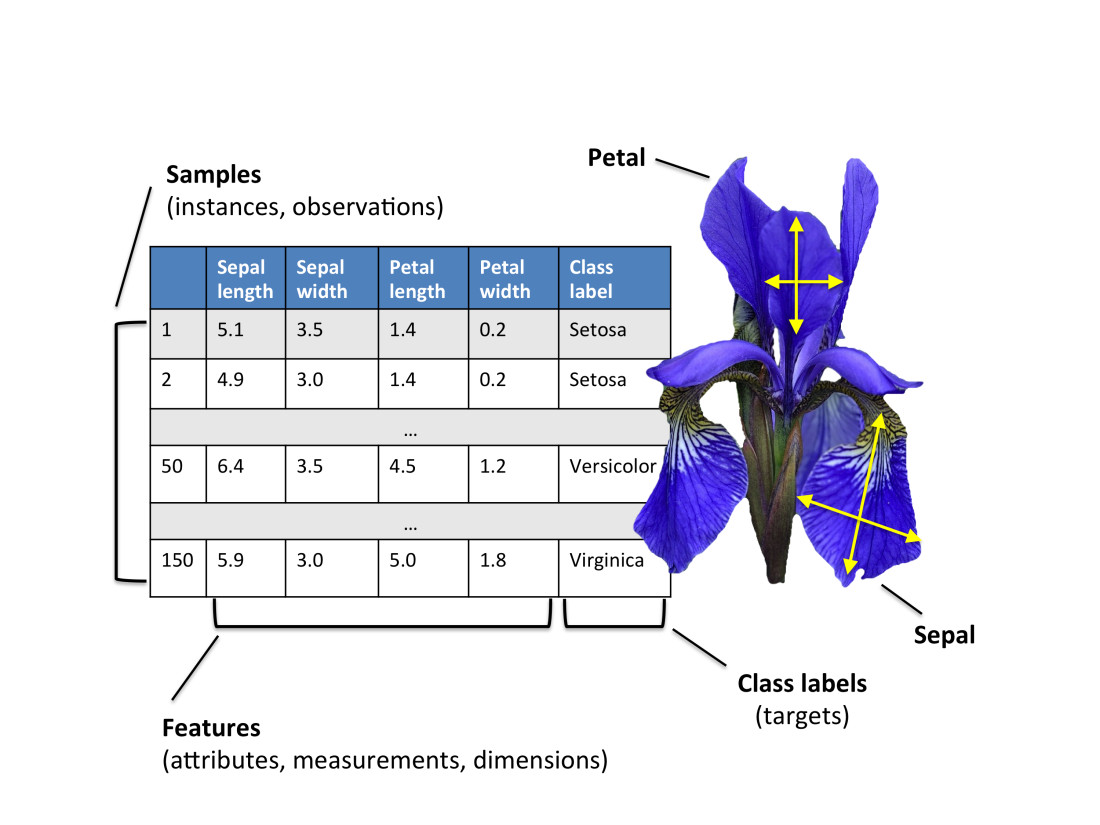

In [19]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
df_iris.shape

(150, 5)

In [21]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada  #iloc= pegando todas as entradas[:, :-1]
y = df_iris.iloc[:, 4].values  # saídas ou target  #iloc faz essa selação

In [25]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset (split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste (tamanho)

In [26]:
# realiza o processo de NORMALIZAÇÃO dos dados 
from sklearn.preprocessing import StandardScaler #normalizar(colocar todos os dados na mesma escala)
scaler = StandardScaler()  #objeto que normaliza os dados (instanciar)
scaler.fit(X_train)  #realiza a normalização dos dados (fit)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#treina o modelo (USANDO KNN (KNeighborsClassifier))
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
#realiza a previsão (testar com 20% dos dados )(avaliar se o modelo está classificando bem ou não)
y_pred = classifier.predict(X_test)

In [29]:
#constroi a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#acuracia = 0.93% dos casos classificar corretamente com a previsão

[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.88      0.88      0.88         8
         2.0       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



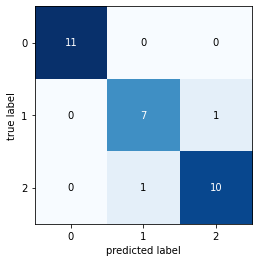

In [30]:
#realiza o plot da matriz de confusão (ver a classificação das instancias)
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim do exemplo algoritmo KNN

**Exemplo do algoritmo Supervisionado  - Árvore de Decisão** esse modelo pode ser usado tanto para CLASSIFICAÇÃO quanto para REGRESSÃO

In [31]:
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão (dentro da biblioteca do scikitlearn) (CLASSIFICAÇÃO = DecisionTreeClassifier)
from sklearn import metrics #importa as métricas para avaliação


In [34]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador (DADOS DE X E Y  usados anteriormente)
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao  (dados de entrada e saida ja foram definidos acima)
y_pred = clf.predict(X_test)

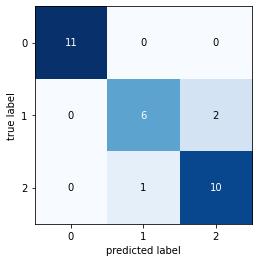

In [35]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [36]:
#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz #parte grafica
from sklearn.externals.six import StringIO  #nomes de entradas e saídas
from IPython.display import Image   #mostrar
import pydotplus #plotar

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


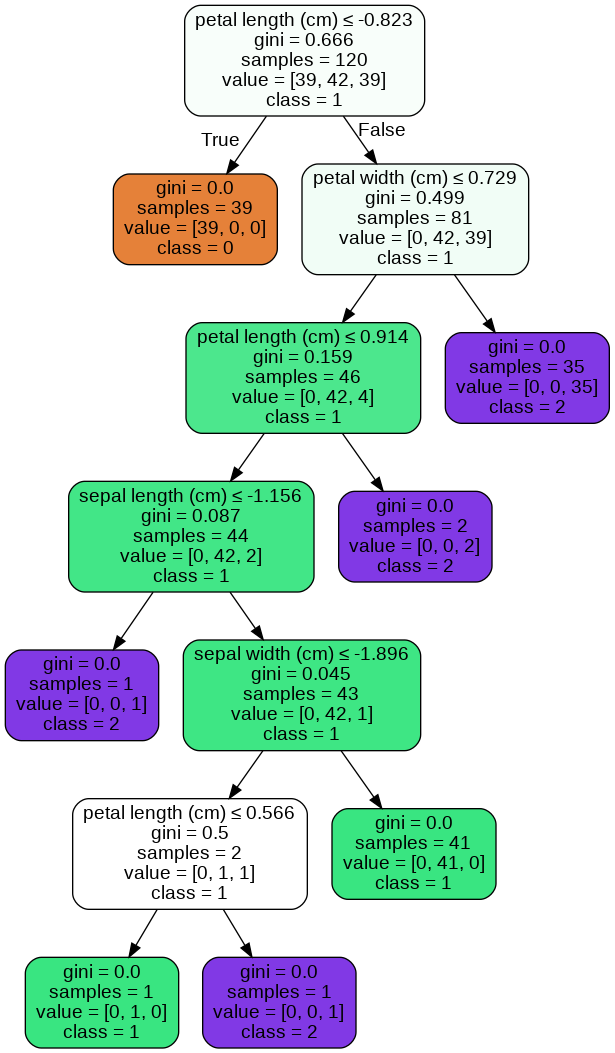

In [37]:
#Constrói a árvore de decisão para o DB Iris - VER COMO A ARVORE DE DECISAO CHEGOU AO RESULTADO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

Fim do algoritmo do modelo de árvore de decisão.

**Exemplo do algoritmo Supervisionado  - Suppor Vector Machine (SVM)**

In [38]:
#biblioteca necessária para a construção do SVM 
from sklearn.svm import SVC

In [39]:
#cria o objeto SVM
clf = SVC()    

In [40]:
#realiza a classificação via SVM (treinar)
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
#Realiza a previsão de classificaçao (a partir dos dados de teste de entrada, encontramos a saída)
y_pred = clf.predict(X_test)

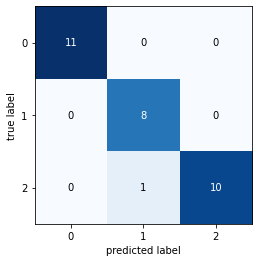

In [42]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim do exemplo de algoritmo SVM 

**Exemplo de Redes Neurais**

In [46]:
#definição da biblioteca (modelo MLP-Perceptron multicamada) (para fazer a CLASSIFICAÇÃO)
from sklearn.neural_network import MLPClassifier

In [48]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com 5 neurônios cada 
#(RANDOM_STATE=1 para usar os mesmos dados de entrada e ter resultados de saídas semelhantes)

In [49]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [50]:
#realiza a previsão
y_pred=clf.predict(X_test)

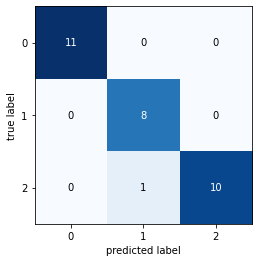

In [51]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim do exemplo do algoritmo de Redes Neurais MLP

**Rede neural em deep learning com o TensorFlow**

In [52]:
from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas (entradas, intermediarias(dense) e saída) Dropout(evitar overfit)
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
import seaborn as sns #plotar gráficos

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
dataset = sns.load_dataset('iris') #importando o dataset (com seaborn)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
#dividindo entre entrada e saida (OBS ESSES MODELOS NÃO SE COMPORTAM MUITO BEM COM VALORES STRING, TRANSF P NUMERICO)
X = dataset.drop(['species'], axis=1) #remover col species
y = pd.get_dummies(dataset.species, prefix='output') #transforma cada uma das classes em vetores 

In [55]:
X.head() #entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y.head() #saidas (já em forma de vetores) 

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
#divide os dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

In [59]:
from sklearn.preprocessing import StandardScaler #aplica a normalização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# criando a rede (linkando toda a reda através das camadas)
entrada = Input(shape=(X_train.shape[1],)) #shape tamanho da entrada (1=todas as cols) 
camada_1 = Dense(100, activation='relu')(entrada) #camada intermediária , quantidade de neuronios =100, conecta a entrada com a camada_1 e assim sucessivamente 
camada_2 = Dense(50, activation='relu')(camada_1) # traz da camada_1
camada_3 = Dense(25, activation='relu')(camada_2) # traz da camada_2
saida = Dense(y_train.shape[1], activation='softmax')(camada_3) #traz da camada 3 e def a saída

In [62]:
model = Model(inputs = entrada, outputs = saida) #define o modelo

In [63]:
# Paramentros das camadas 
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile = como a rede vai definir e otimizar o erro, encontrar a combinação dos 6,903 paramentros e me dará o menor erro possível
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [65]:
#realizando o treinamendo da nossa rede  (epochs: numero de treinamentos usados), (verbose=1 acompanhar as saídas)
history = model.fit(X_train, y_train, batch_size=4, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
24/24 [==============================] - 0s 9ms/step - loss: 0.9613 - acc: 0.5208 - val_loss: 0.8699 - val_acc: 0.5417
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.7264 - acc: 0.6979 - val_loss: 0.7556 - val_acc: 0.6250
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6144 - acc: 0.7708 - val_loss: 0.6889 - val_acc: 0.7500
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5080 - acc: 0.8125 - val_loss: 0.5841 - val_acc: 0.7917
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3953 - acc: 0.8542 - val_loss: 0.5071 - val_acc: 0.7917
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2911 - acc: 0.8646 - val_loss: 0.3758 - val_acc: 0.8333
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2148 - acc: 0.9271 - val_loss: 0.3049 - val_acc: 0.8750
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1664 - acc: 0.97

In [66]:
# Acurácia do modelo 
acuracia=model.evaluate(X_test, y_test, verbose=1) #acurácia do modelo

print("Acurácia do modelo:", acuracia[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.2921 - acc: 0.9000
Acurácia do modelo: 0.8999999761581421


Fim do exemplo do algoritmo de Redes Neurais